# Dataset Prepration


Data: https://universe.roboflow.com/universiti-malaysia-pahang-qcvas/objectdetection-ngxjp/dataset/5#

In [1]:
!pip install roboflow

  Using cached roboflow-1.1.49-py3-none-any.whl.metadata (9.7 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached charset_normalizer-3.4.0-

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="skEPDS7Q7wd0RVzeXds0")
project = rf.workspace("stage0").project("stage-0")
version = project.version(3)
dataset = version.download("florence2-od")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to stage-0-3 in florence2-od:: 100%|██████████| 1600/1600 [00:04<00:00, 344.97it/s]


TXT-Json 

In [ ]:
# import os
# import json

# # annotations_dir = "/content/objectdetection-5/train/labels"
# # output_json_file = "/content/objectdetection-5/train/images/train_annotations.json"


# # annotations_dir = "/content/objectdetection-5/test/labels"
# # output_json_file = "/content/objectdetection-5/test/images/test_annotations.json"

# annotations_dir = "/content/objectdetection-5/valid/labels"
# output_json_file = "/content/objectdetection-5/valid/images/val_annotations.json"



# def parse_yolo_annotation(annotation_file):
#     with open(annotation_file, 'r') as f:
#         lines = f.readlines()

#     image_name = os.path.basename(annotation_file).replace('.txt', '.jpg')
#     prefix = "<OD>"
#     suffix_lines = []

#     for line in lines:
#         parts = line.strip().split()
#         class_name = parts[0]
#         x_center = float(parts[1])
#         y_center = float(parts[2])
#         width = float(parts[3])
#         height = float(parts[4])

#         x1 = int((x_center - width/2) * 1000)
#         y1 = int((y_center - height/2) * 1000)
#         x2 = int((x_center + width/2) * 1000)
#         y2 = int((y_center + height/2) * 1000)

#         # Replace '0' with 'face' in the class name if it equals '0'
#         if class_name == '0':
#             class_name = 'DC Power Supply'
#         elif class_name == '1':
#             class_name = 'Digital Multimeter'
#         elif class_name == '2':
#             class_name = 'Digital Trainer'
#         elif class_name == '3':
#             class_name = 'Function Generator'
#         elif class_name == '4':
#             class_name = 'Oscilloscope'
#         suffix_line = f"{class_name}<loc_{x1}><loc_{y1}><loc_{x2}><loc_{y2}>"
#         suffix_lines.append(suffix_line)

#     json_obj = {
#         "image": image_name,
#         "prefix": prefix,
#         "suffix": "".join(suffix_lines)
#     }

#     return json_obj

# annotations_json_strings = []

# for filename in os.listdir(annotations_dir):
#     if filename.endswith(".txt"):
#         annotation_file = os.path.join(annotations_dir, filename)
#         annotation_obj = parse_yolo_annotation(annotation_file)
#         json_string = json.dumps(annotation_obj, separators=(',', ':'))
#         annotations_json_strings.append(json_string)

# with open(output_json_file, 'w') as json_file:
#     json_file.write("\n".join(annotations_json_strings))

# print(f"Annotations have been written to {output_json_file}")


Annotations have been written to /content/objectdetection-5/valid/images/val_annotations.json


# Custom training

In [3]:
!pip install peft

  Using cached peft-0.13.2-py3-none-any.whl.metadata (13 kB)
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached transformers-4.46.2-py3-none-any.whl.metadata (44 kB)
  Using cached accelerate-1.1.1-py3-none-any.whl.metadata (19 kB)
  Using cached safetensors-0.4.5-cp311-none-win_amd64.whl.metadata (3.9 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached tokenizers-0.20.3-cp311-none-win_amd64.whl.metadata (6.9 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached peft-0.13.2-py3-none-any.whl (320 kB

In [4]:
import io
import os
import re
import json
import torch
import html
import base64
import itertools

import numpy as np
from IPython.core.display import display, HTML
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AdamW,
    AutoModelForCausalLM,
    AutoProcessor,
    get_scheduler
)
from tqdm import tqdm
from typing import List, Dict, Any, Tuple, Generator
from peft import LoraConfig, get_peft_model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


NameError: name 'nvcc' is not defined

In [6]:
!pip install flash_attn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      fatal: not a git repository (or any of the parent directories): .git
      
      
      torch.__version__  = 2.5.1+cpu
      
      
      C:\Users\ParthaPratimKaliati\AppData\Local\Temp\pip-install-xnyr338a\flash-attn_9afe81e3f87747d497d9ad05b86ee207\setup.py:99: UserWarning: flash_attn was requested, but nvcc was not found.  Are you sure your environment has nvcc available?  If you're installing within a container from https://hub.docker.com/r/pytorch/pytorch, only images whose names contain 'devel' will provide nvcc.
        warnings.warn(
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ParthaPratimKaliati\AppData\Local\Temp\pip-install-xnyr338a\flash-attn_9afe81e3f87747d497d9ad05b86ee207\setup.py", line 183, in <modul


  Using cached flash_attn-2.7.0.post2.tar.gz (2.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [9]:
import torch
from transformers import AutoModelForCausalLM

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_id = 'microsoft/Florence-2-large'
#model_id = 'microsoft/Florence-2-base'


# Load model onto the determined device
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).to(DEVICE)

processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


Importing from timm.models.layers is deprecated, please import via timm.layers
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [10]:
# Define DetectionsDataset class

class JSONLDataset:
    def __init__(self, jsonl_file_path: str, image_directory_path: str):
        self.jsonl_file_path = jsonl_file_path
        self.image_directory_path = image_directory_path
        self.entries = self._load_entries()

    def _load_entries(self) -> List[Dict[str, Any]]:
        entries = []
        with open(self.jsonl_file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                entries.append(data)
        return entries

    def __len__(self) -> int:
        return len(self.entries)

    def __getitem__(self, idx: int) -> Tuple[Image.Image, Dict[str, Any]]:
        if idx < 0 or idx >= len(self.entries):
            raise IndexError("Index out of range")

        entry = self.entries[idx]
        image_path = os.path.join(self.image_directory_path, entry['image'])
        try:
            image = Image.open(image_path)
            return (image, entry)
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file {image_path} not found.")


class DetectionDataset(Dataset):
    def __init__(self, jsonl_file_path: str, image_directory_path: str):
        self.dataset = JSONLDataset(jsonl_file_path, image_directory_path)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, data = self.dataset[idx]
        prefix = data['prefix']
        suffix = data['suffix']
        return prefix, suffix, image

In [12]:
# Initiate DetectionsDataset and DataLoader for train and validation subsets
BATCH_SIZE = 6
NUM_WORKERS = 0

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(DEVICE)
    return inputs, answers

# train_dataset = DetectionDataset(
#     jsonl_file_path = "/content/objectdetection-5/train/images/train_annotations.json",
#     image_directory_path = "/content/objectdetection-5/train/images"
# )


train_dataset = DetectionDataset(
    jsonl_file_path = "C:\\projects\\florence2\\stage-0-3\\train\\annotations.jsonl",
    image_directory_path = "C:\\projects\\florence2\\stage-0-3\\train"
)

val_dataset = DetectionDataset(
    jsonl_file_path = "C:\\projects\\florence2\\stage-0-3\\valid\\annotations.jsonl",
    image_directory_path = "C:\\projects\\florence2\\stage-0-3\\valid"
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, num_workers=NUM_WORKERS, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, num_workers=NUM_WORKERS)

In [13]:
# Setup LoRA Florence-2 model

config = LoraConfig(
    r=8,
    lora_alpha=8,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "linear", "Conv2d", "lm_head", "fc2"],
    task_type="CAUSAL_LM",
    lora_dropout=0.05,
    bias="none",
    inference_mode=False,
    use_rslora=True,
    init_lora_weights="gaussian",
)

peft_model = get_peft_model(model, config)
peft_model.print_trainable_parameters()

trainable params: 4,133,576 || all params: 826,827,464 || trainable%: 0.4999


## Test on pretrained model

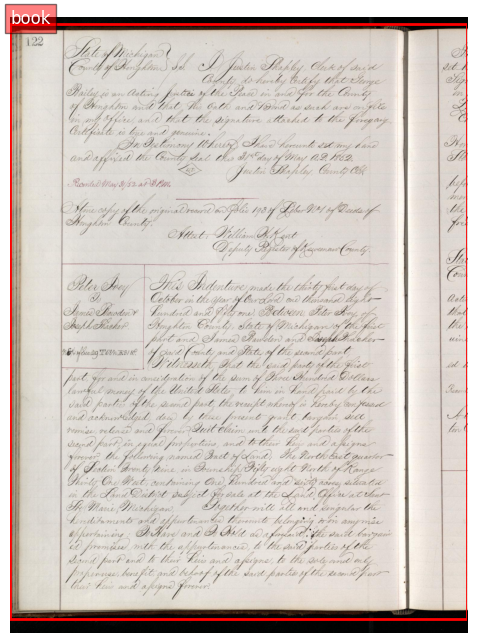

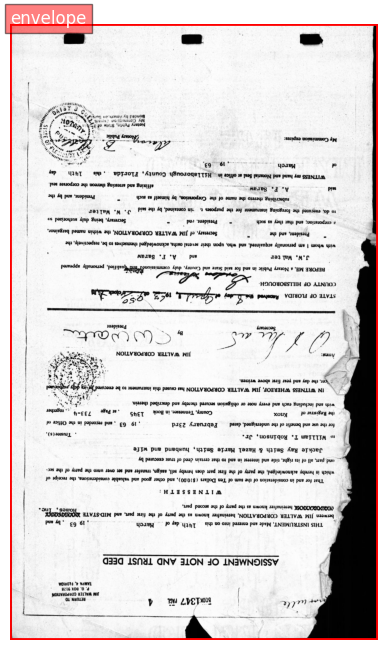

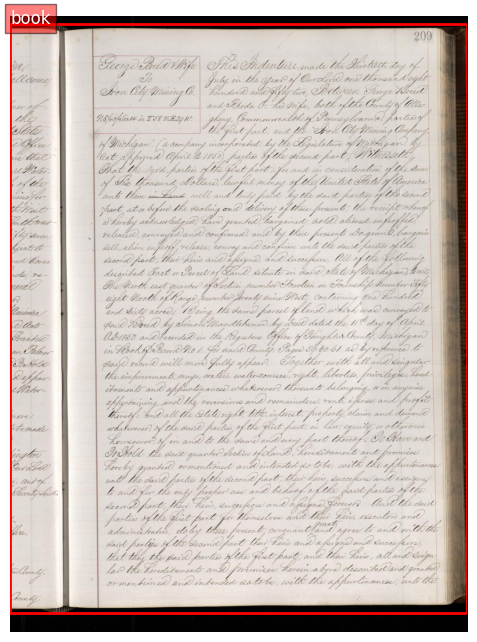

In [ ]:
import matplotlib.pyplot as plt

def plot_bboxes_on_image(image, bboxes, labels):
    plt.figure(figsize=(10, 8))
    plt.imshow(image)

    ax = plt.gca()
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        width = xmax - xmin
        height = ymax - ymin
        rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(xmin, ymin - 2, label, bbox=dict(facecolor='red', alpha=0.5), fontsize=12, color='white')

    plt.axis('off')
    plt.show()




def florence2_inference_results(model, dataset: DetectionDataset, count: int):
    count = min(count, len(dataset))
    for i in range(count):
        image, data = dataset.dataset[i]
        prefix = data['prefix']
        suffix = data['suffix']
        inputs = processor(text=prefix, images=image, return_tensors="pt").to(DEVICE)
        #inputs = processor(text=prompt, images=image, return_tensors="pt")

        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            early_stopping=False,
            do_sample=False,
            num_beams=3,
        )
        generated_text = processor.batch_decode(generated_ids,
                                                skip_special_tokens=False)[0]
        parsed_answer = processor.post_process_generation(
            generated_text,
            task='<OD>',
            image_size=(image.width, image.height))
        # Access bounding boxes and labels
        od_results = parsed_answer['<OD>']
        bboxes = od_results['bboxes']
        labels = od_results['labels']

        # Plot bounding boxes on the image using the separate function
        plot_bboxes_on_image(image, bboxes, labels)
    return parsed_answer


florence2_inference_results(peft_model, val_dataset, 8)

In [ ]:
# training loop

def train_model(train_loader, val_loader, model, processor, epochs=1, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    #florence2_inference_results(peft_model, val_loader.dataset, 3)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, answers in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(
                text=answers,
                return_tensors="pt",
                padding=True,
                return_token_type_ids=False
            ).input_ids.to(DEVICE)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward(), optimizer.step(), lr_scheduler.step(), optimizer.zero_grad()
            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, answers in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(
                    text=answers,
                    return_tensors="pt",
                    padding=True,
                    return_token_type_ids=False
                ).input_ids.to(DEVICE)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            print(f"Average Validation Loss: {avg_val_loss}")

            florence2_inference_results(peft_model, val_loader.dataset, 2)

        output_dir = f"./model_checkpoints/epoch_{epoch+1}"
        os.makedirs(output_dir, exist_ok=True)
        model.save_pretrained(output_dir)
        processor.save_pretrained(output_dir)

In [15]:
#  Training

EPOCHS = 1
LR = 4e-6
train_model(train_loader, val_loader, peft_model, processor, epochs=EPOCHS, lr=LR)

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
Training Epoch 1/1:   0%|          | 0/17 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 244.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 9.06 MiB is free. Process 3133 has 14.74 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 64.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)